In [1]:
%who

Interactive namespace is empty.


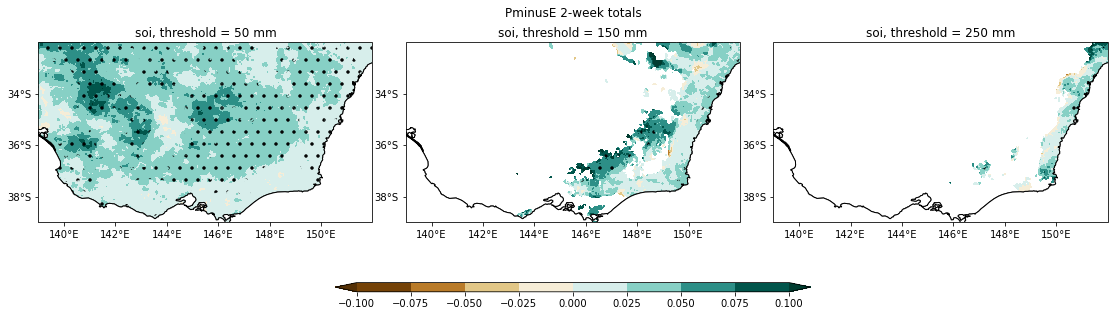

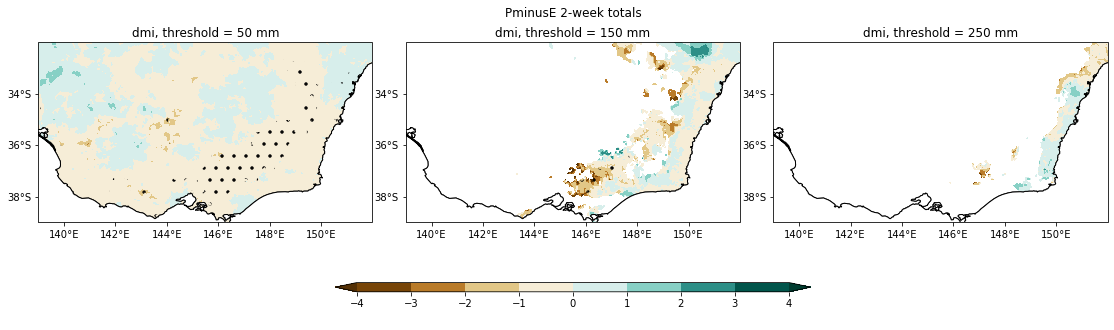

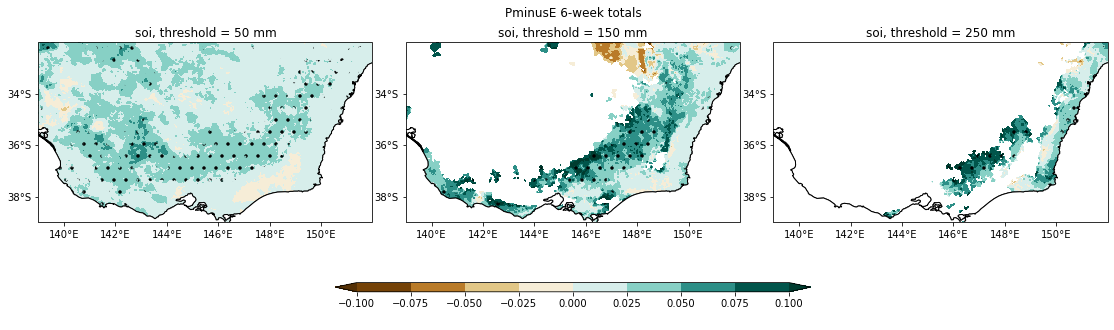

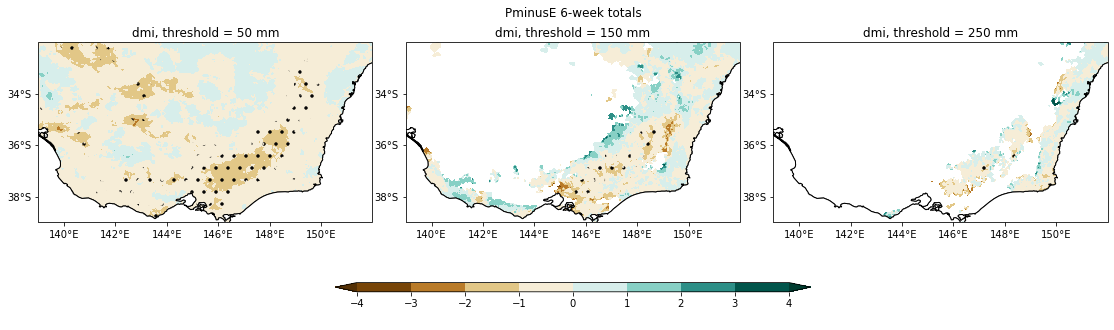

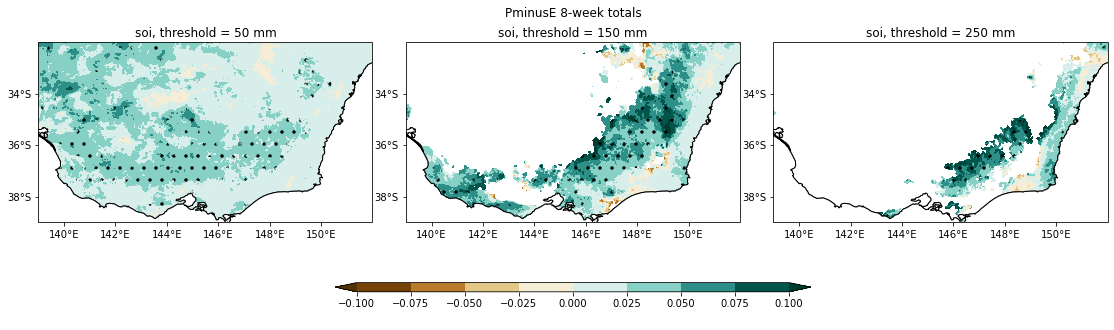

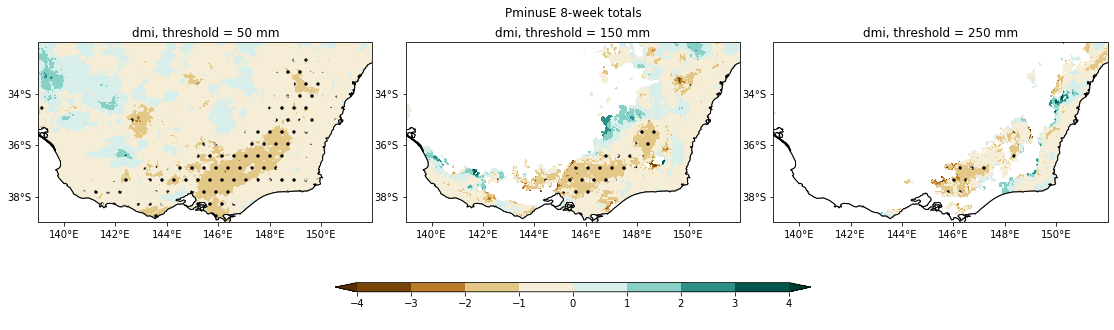

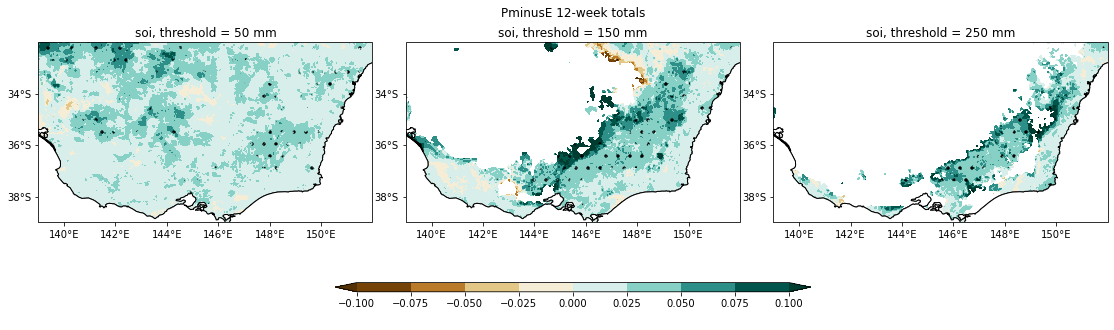

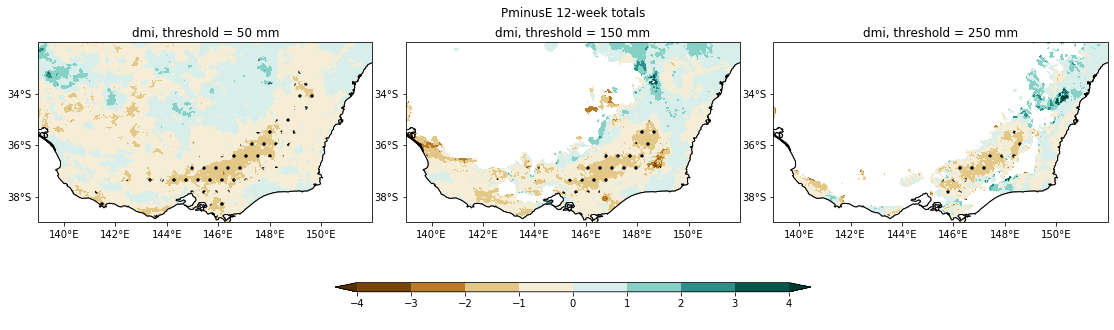

In [8]:
# Spatial plot of GLM parameters for all predictors

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

ts_list = ['week2', 'week6', 'week8', 'week12']
varname = 'PminusE'
tsText_list = [str(x) + '-week totals' for x in [2, 6, 8, 12]]

for i in np.arange(len(ts_list)):
    ts = ts_list[i]
    tsText = tsText_list[i]
    
    # Define the contour levels to use in plt.contourf
    clevs_list = [np.linspace(-0.1,0.1,9), np.linspace(-4,4,9)]
    # clevs = 9

    # get data
    data_path = '/g/data/w97/ad9701/p_prob_analysis/temp_files/' + varname + '_' + ts + '/'
    f_params = 'GLM_params_season_soi_dmi.nc'
    f_pval = 'GLM_pvalues_season_soi_dmi.nc'
    f_prob = 'GLM_probability_season_soi_dmi.nc'
    ds_params = xr.open_dataset(data_path + f_params)
    ds_pval = xr.open_dataset(data_path + f_pval)
    ds_prob = xr.open_dataset(data_path + f_prob)

    # names of data arrays within the file
    param = 'glm_params'
    pval = 'glm_pvalues'

    # select significance level (p < alpha), drivers and thresholds to plot
    alpha = 0.05
    drivers = ['soi', 'dmi'] #ds_params['parameter'].values[4:]
    threshold = [50, 150, 250]

    outdir = 'figures/logiReg_coeff_gridded/'

    count = 0
    for x in drivers:
        clevs = clevs_list[count]
        figname = varname + '_' + ts + '_GLM_coeff_sig_' + str(alpha) + '_' + x + '.png'
        data_list = []
        data_hatch_list = []
        for y in threshold:
            param_driver_thers = ds_params[param].sel(parameter=x, threshold=y)
            pval_driver_thres = ds_pval[pval].sel(parameter=x, threshold=y)
            data_list.append(param_driver_thers) #.where(pval_driver_thres < alpha))
            data_hatch_list.append(pval_driver_thres.where(pval_driver_thres < alpha))
        title_list = [x + ', threshold = ' + str(y) + ' mm' for y in threshold]
        cBarText = ' '
        cmapSel = 'BrBG' #'YlGnBu'
        mainTitle = varname + ' ' + tsText

        ds = ds_params
        %run -i drought_probability/spatial_plot_3panels.py
        #%run -i drought_probability/spatial_plot_6panels.py
        count = count + 1

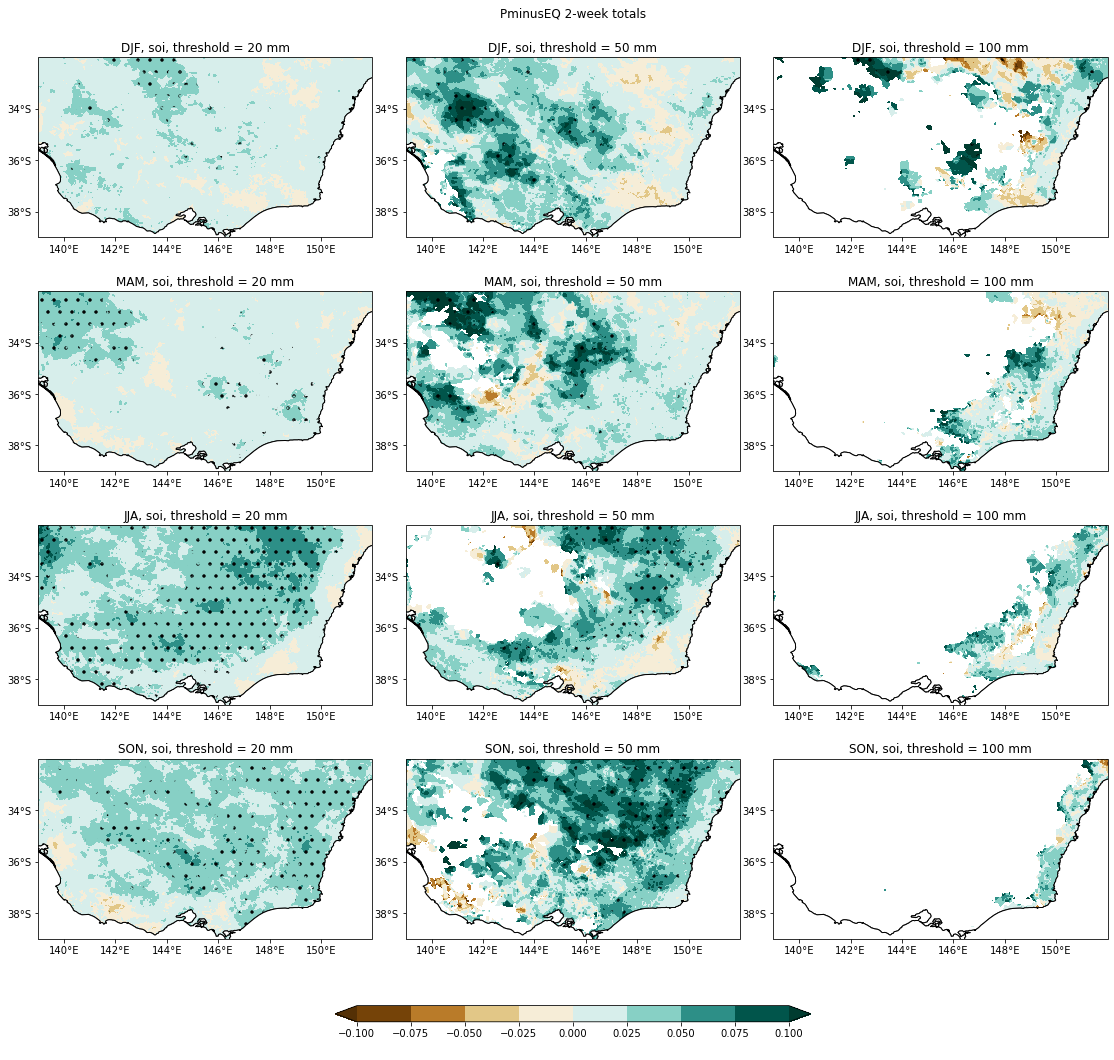

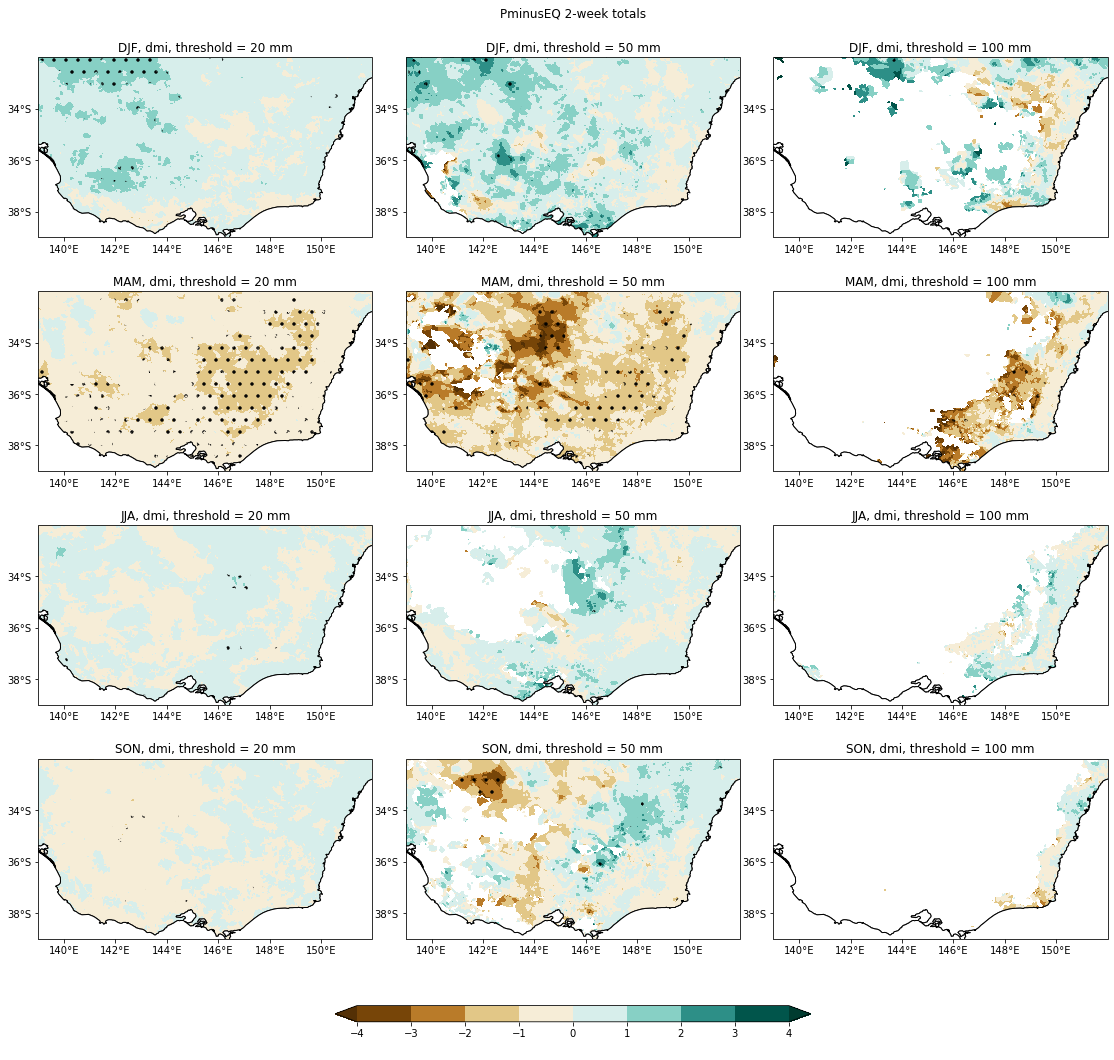

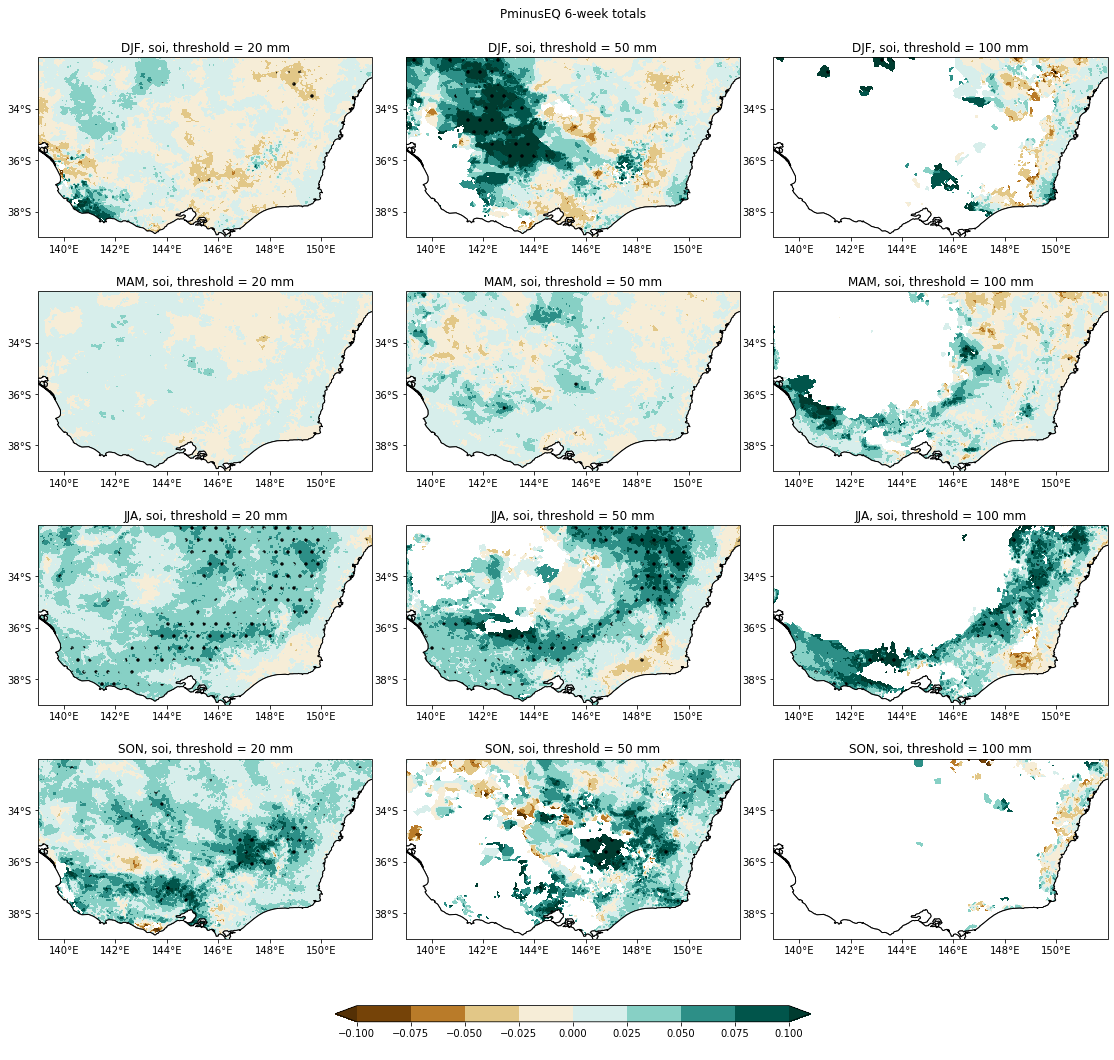

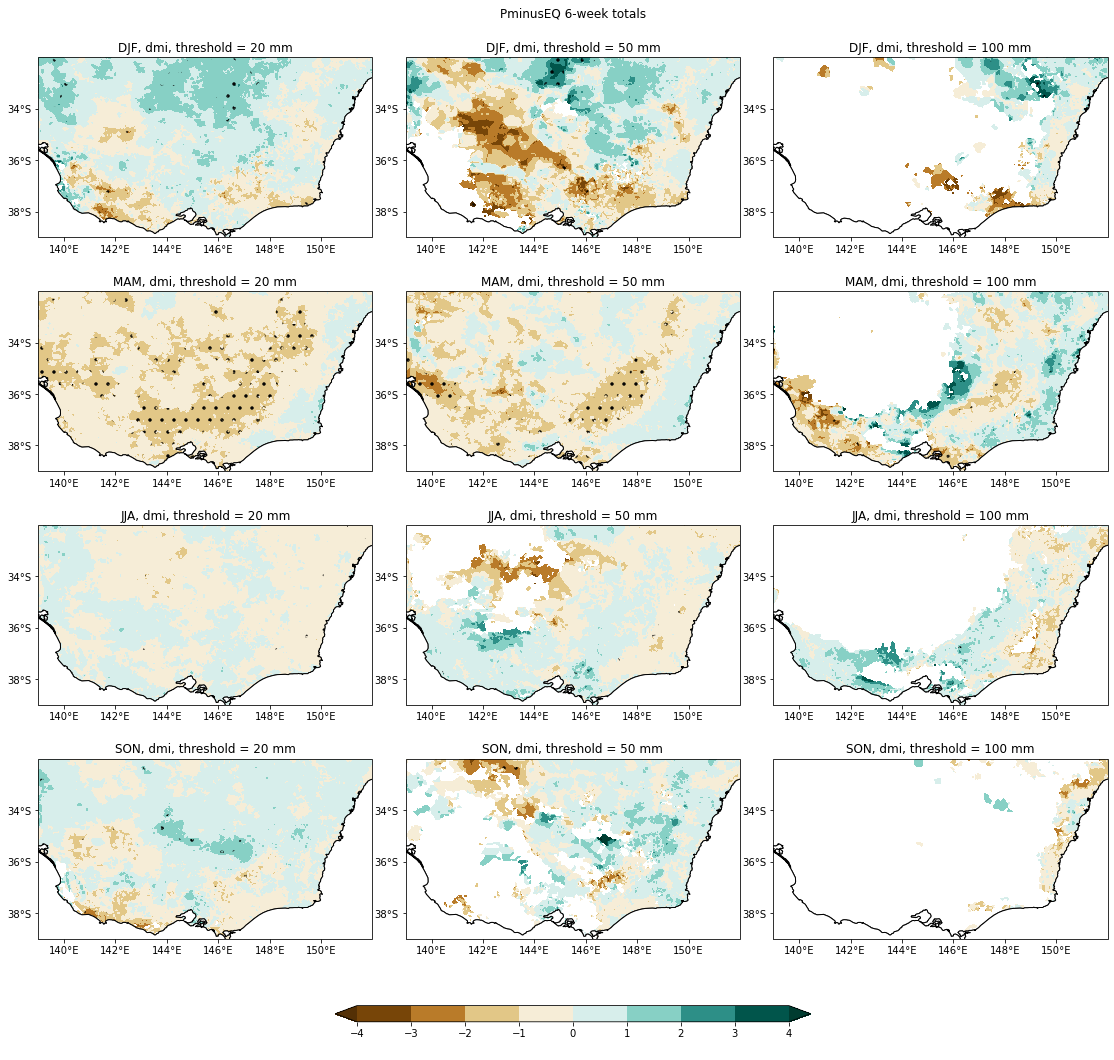

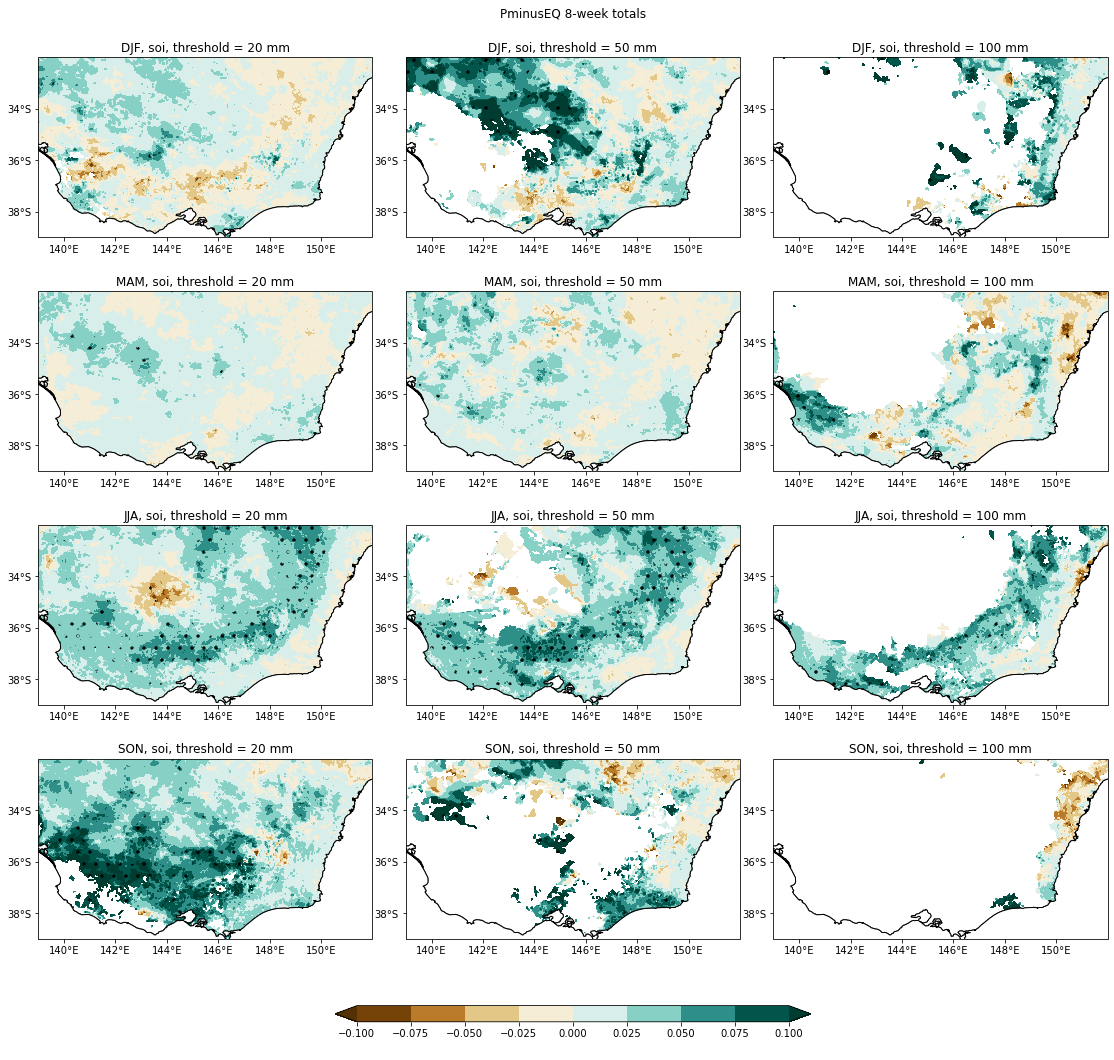

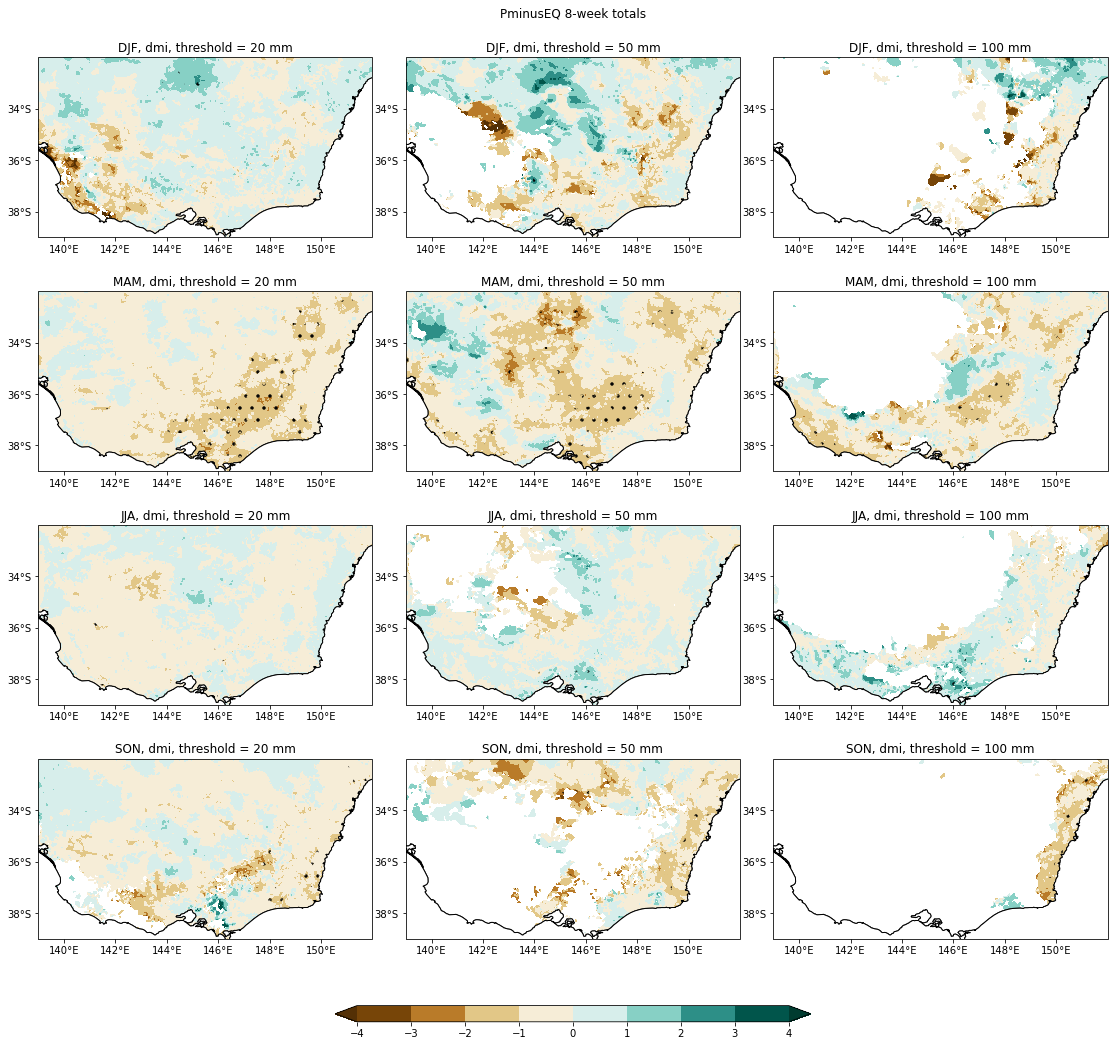

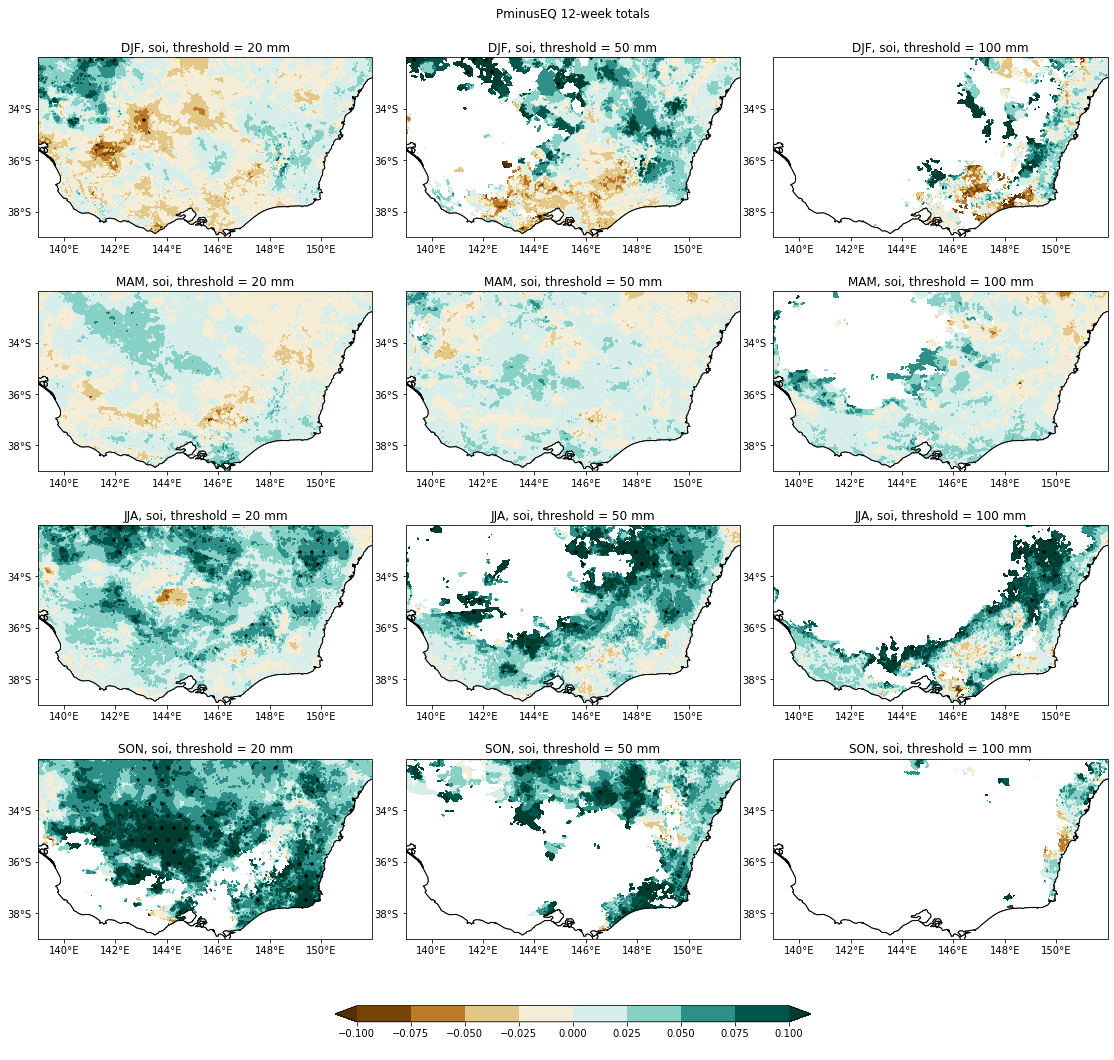

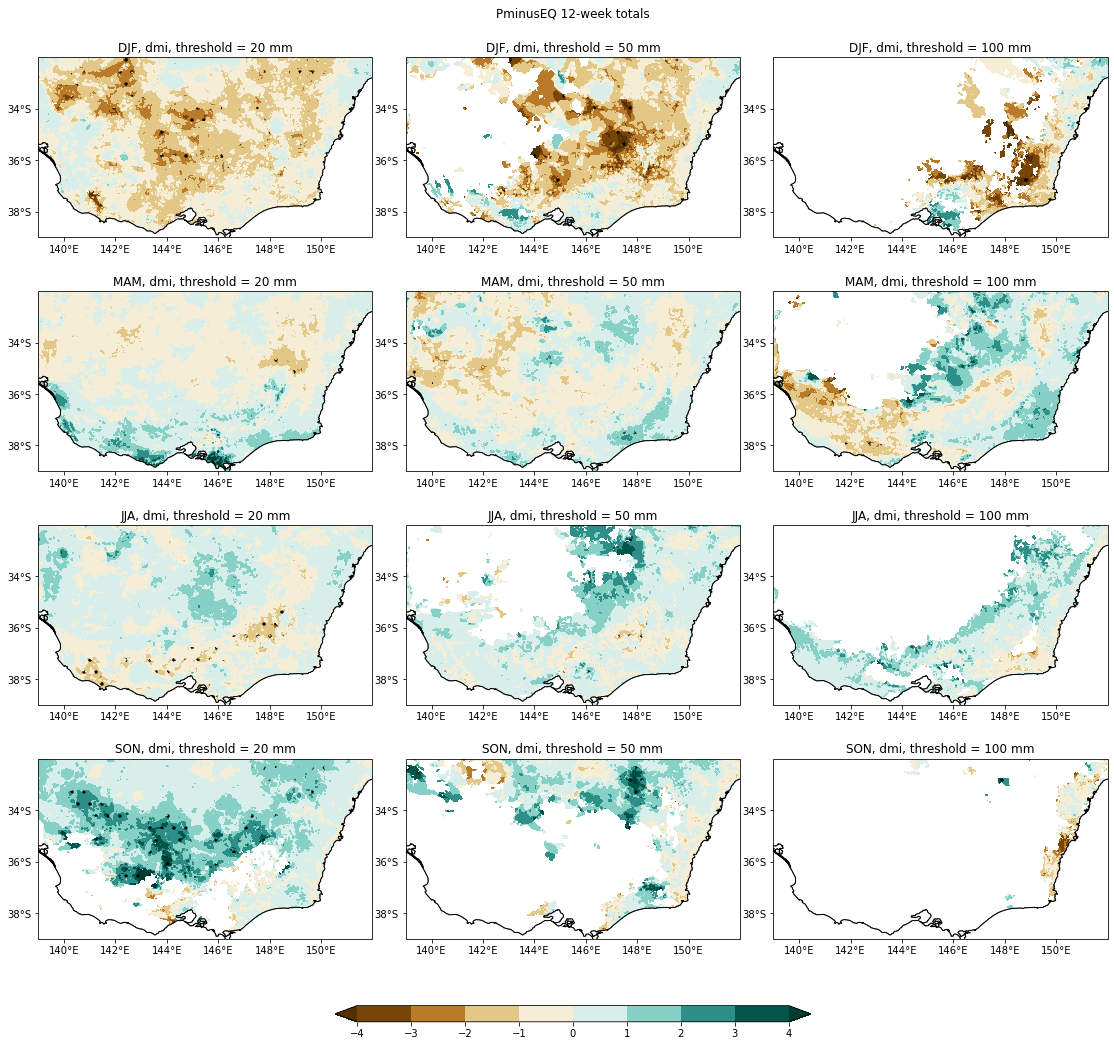

In [19]:
# Spatial plot of GLM parameters for all predictors

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

ts_list = ['week2', 'week6', 'week8', 'week12']
varname = 'PminusEQ'
tsText_list = [str(x) + '-week totals' for x in [2, 6, 8, 12]]

seas_names = ['DJF', 'MAM', 'JJA', 'SON']

for i in range(len(ts_list)):
    ts = ts_list[i]
    tsText = tsText_list[i]
    
    # Define the contour levels to use in plt.contourf
    clevs_list = [np.linspace(-0.1,0.1,9), np.linspace(-4,4,9)]
    # clevs = 9

    # get data
    data_path = '/g/data/w97/ad9701/p_prob_analysis/temp_files/' + varname + '_' + ts + '/'
    fname = 'GLM_results_soi_dmi_bySeason.nc'
    ds = xr.open_dataset(data_path + fname)

    # names of data arrays within the file
    param = 'glm_params'
    pval = 'glm_pvalues'

    # select significance level (p < alpha), drivers and thresholds to plot
    alpha = 0.05
    drivers = ['soi', 'dmi'] #list(ds.parameter.values) #['soi', 'dmi'] #ds_params['parameter'].values[4:]
    threshold = list(ds.threshold.values) #[20, 50, 100]

    outdir = 'figures/logiReg_coeff_gridded/'

    count = 0
    for x in drivers:
        
        clevs = clevs_list[count]
        figname = varname + '_' + ts + '_GLM_coeff_sig_' + str(alpha) + '_' + x + '_bySeason.png'
        data_list = []
        data_hatch_list = []
        for seas in seas_names:
            for y in threshold:
                param_driver_thers = ds[param].sel(parameter=x, threshold=y, season=seas)
                pval_driver_thres = ds[pval].sel(parameter=x, threshold=y, season=seas)
                data_list.append(param_driver_thers) #.where(pval_driver_thres < alpha))
                data_hatch_list.append(pval_driver_thres.where(pval_driver_thres < alpha))
        title_list = [z + ', ' + x + ', threshold = ' + str(y) + ' mm' for z in seas_names for y in threshold]
        cBarText = ' '
        cmapSel = 'BrBG' #'YlGnBu'
        mainTitle = varname + ' ' + tsText

        %run -i drought_probability/spatial_plot_12panels.py
        #%run -i drought_probability/spatial_plot_6panels.py
        count = count + 1

KeyboardInterrupt: 

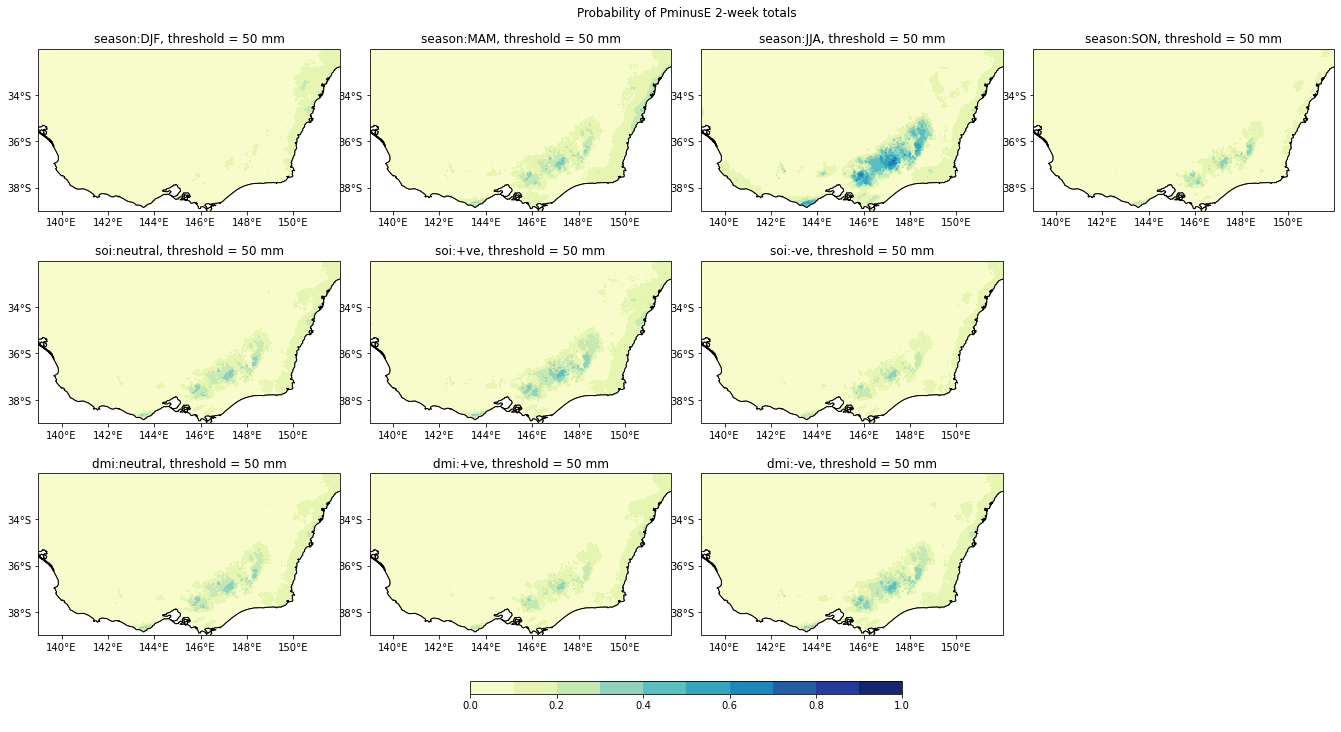

In [4]:
# Spatial plot of probabilities estimated from GLM fit

import xarray as xr
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import pickle

import cartopy.feature as cfeature
import cartopy.crs as ccrs
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

ts_list = ['week2', 'week6', 'week8', 'week12']
varname = 'PminusE'
tsText_list = [str(x) + '-week totals' for x in [2, 6, 8, 12]]

# forgot to save the sample points in the netcdf file
file_sample = '/g/data/w97/ad9701/p_prob_analysis/temp_files/' + 'lgR_sample_points.pkl'
with open(file_sample, 'rb') as f:
    sample_points = pickle.load(f)
    
predictors = list(sample_points.keys())
pred_names = []
pred_index = []
for pred in predictors:
    pred_uq_all = pd.unique(sample_points[pred])
    if type(pred_uq_all[1]) == str:
        pred_names.extend([pred + ':' + i for i in pred_uq_all])
    else:
        pred_names.extend([pred + i for i in [':neutral', ':+ve', ':-ve']])
    for pred_uq in pred_uq_all:
        pred_index.append(sample_points[sample_points[pred]==pred_uq].index.values)
    
for i in np.arange(len(ts_list)):
    ts = ts_list[i]
    tsText = tsText_list[i]
    
    # Define the contour levels to use in plt.contourf
    clevs = np.linspace(0,1,11)
    # clevs = 9

    # get data
    data_path = '/g/data/w97/ad9701/p_prob_analysis/temp_files/' + varname + '_' + ts + '/'
    f_params = 'GLM_params_season_soi_dmi.nc'
    f_pval = 'GLM_pvalues_season_soi_dmi.nc'
    f_prob = 'GLM_probability_season_soi_dmi.nc'
    ds_params = xr.open_dataset(data_path + f_params)
    ds_pval = xr.open_dataset(data_path + f_pval)
    ds_prob = xr.open_dataset(data_path + f_prob)

    # names of data arrays within the file
    param = 'glm_params'
    pval = 'glm_pvalues'
    prob = 'glm_probability'

    # select significance level (p < alpha), drivers and thresholds to plot
    alpha = 0.05
    drivers = ds_params['parameter'].values[4:]
    threshold = [50, 150, 250]

    outdir = 'figures/logiReg_prob_gridded/'
    
    data_list = []
    #data_hatch_list = []
    for y in threshold:
        figname = varname + '_' + ts + '_GLM_prob_' + str(y) + '_threshold.png'
        for x in np.arange(len(pred_names)):
            prob_sample_thers = ds_prob[prob].sel(sample=pred_index[x], threshold=y).mean('sample')
            data_list.append(prob_sample_thers) #.where(pval_driver_thres < alpha))
        title_list = [x + ', threshold = ' + str(y) + ' mm' for x in pred_names]
        cBarText = ' '
        cmapSel = 'YlGnBu'
        mainTitle = 'Probability of ' + varname + ' ' + tsText
        ds = ds_prob
        %run -i drought_probability/spatial_plot_prob_3x4panels.py

In [108]:
predictors = list(sample_points.keys())
pred_names = []
pred_index = []
for pred in predictors:
    pred_uq_all = pd.unique(sample_points[pred])
    if type(pred_uq_all[1]) == str:
        pred_names.extend([pred + ':' + i for i in pred_uq_all])
    else:
        pred_names.extend([pred + i for i in [':neutral', ':+ve', ':-ve']])
    for pred_uq in pred_uq_all:
        pred_index.append(sample_points[sample_points[pred]==pred_uq].index.values)
        
print(pred_names)
print(pred_index)

['season:DJF', 'season:MAM', 'season:JJA', 'season:SON', 'soi:neutral', 'soi:+ve', 'soi:-ve', 'dmi:neutral', 'dmi:+ve', 'dmi:-ve']
[array([0, 1, 2, 3, 4, 5, 6, 7, 8]), array([ 9, 10, 11, 12, 13, 14, 15, 16, 17]), array([18, 19, 20, 21, 22, 23, 24, 25, 26]), array([27, 28, 29, 30, 31, 32, 33, 34, 35]), array([ 0,  1,  2,  9, 10, 11, 18, 19, 20, 27, 28, 29]), array([ 3,  4,  5, 12, 13, 14, 21, 22, 23, 30, 31, 32]), array([ 6,  7,  8, 15, 16, 17, 24, 25, 26, 33, 34, 35]), array([ 0,  3,  6,  9, 12, 15, 18, 21, 24, 27, 30, 33]), array([ 1,  4,  7, 10, 13, 16, 19, 22, 25, 28, 31, 34]), array([ 2,  5,  8, 11, 14, 17, 20, 23, 26, 29, 32, 35])]


In [110]:
ds_prob

<xarray.Dataset>
Dimensions:          (lat: 141, lon: 261, threshold: 7, sample: 36)
Coordinates:
  * lat              (lat) float32 -39.0 -38.95 -38.9 ... -32.1 -32.05 -32.0
  * lon              (lon) float32 139.0 139.1 139.1 139.1 ... 151.9 151.9 152.0
  * threshold        (threshold) int64 20 50 100 150 200 250 300
  * sample           (sample) int64 0 1 2 3 4 5 6 7 ... 28 29 30 31 32 33 34 35
Data variables:
    glm_probability  (lat, lon, sample, threshold) float64 ...
    season           (sample) object 'DJF' 'DJF' 'DJF' ... 'SON' 'SON' 'SON'
    soi              (sample) float64 -0.06717 -0.06717 ... -10.16 -10.16
    dmi              (sample) float64 -0.08714 0.2497 -0.424 ... 0.2497 -0.424

In [91]:
ind = sample_points[sample_points['season']=="DJF"].index.values
ds_test = ds_prob[prob].sel(threshold=50, sample=ind)

In [96]:
pd.unique(sample_points['soi'])

array([ -0.06717441,  10.02187934, -10.15622816])

In [71]:
# forgot to save x_new in the netcdf file
import sys
new_path = '/home/566/ad9701/drought_probability/'
if new_path not in sys.path:
    sys.path.append(new_path)
import my_glmfit_funcs as my

# get the sst predictors
sst_dir = '/g/data/w97/ad9701/p_prob_analysis/sst_data/'
pNames = ['soi', 'sami', 'dmi', 'nino34_anom', 'nino4_anom']
pFiles = ['soi_monthly.nc', 'newsam.1957.2021.nc', 'dmi.had.long.data.nc', 'nino34.long.anom.data.nc', 'nino4.long.anom.data.nc']
for p in np.arange(len(pNames)):
    ds_temp = xr.open_dataset(sst_dir+pFiles[p])
    if (p>0):
        ds_p[pNames[p]]=ds_temp[pNames[p]]
    else:
        ds_p = ds_temp
    del ds_temp

# select the predictors to include in the model
predSel = ['season', 'soi', 'dmi']
formula = 'response ~ C(season)+soi+dmi'
parameter = ['Intercept', 'C(season)[T.JJA]', 'C(season)[T.MAM]', 'C(season)[T.SON]']
parameter.extend(predSel[1:])
    
# create a new df of sample points at which 'predictions' will be made using the fitted model
time_slice = slice('1911-01-01','2020-05-31')
ds_p_subset = ds_p.sel(time = time_slice)
pred_dict = {}
for p in pNames:
    pred_dict.update({p: ds_p_subset[p].values})
pred_dict.update({"season": ds_p_subset['time.season'].values})    # add season to the sst predictors    
pred_df = pd.DataFrame(pred_dict, index = ds_p_subset['time'])     # make a dataframe of predictors
pred_df_sel = pred_df[predSel]
x_new = my.createSampleDf(pred_df_sel, list(pred_df_sel.keys()))
x_new.head()

,season,soi,dmi
0,DJF,-0.067174,-0.087139
1,DJF,-0.067174,0.249690
2,DJF,-0.067174,-0.423967
3,DJF,10.021879,-0.087139
4,DJF,10.021879,0.249690


In [72]:
### save dataframes for plotting script
import pickle
# df.to_pickle(file_name)

file_sample = '/g/data/w97/ad9701/p_prob_analysis/temp_files/' + 'lgR_sample_points.pkl'

import os, errno

def silentremove(filename):
    try:
        os.remove(filename)
    except OSError as e: # this would be "except OSError, e:" before Python 2.6
        if e.errno != errno.ENOENT: # errno.ENOENT = no such file or directory
            raise # re-raise exception if a different error occurred
            
silentremove(file_sample)

with open(file_sample, 'wb') as f:
    pickle.dump(x_new, f)

In [73]:
!ls /g/data/w97/ad9701/p_prob_analysis/temp_files/*.pkl

/g/data/w97/ad9701/p_prob_analysis/temp_files/lgR_sample_points.pkl
/g/data/w97/ad9701/p_prob_analysis/temp_files/PminusE_lgR_params.pkl
/g/data/w97/ad9701/p_prob_analysis/temp_files/PminusE_lgR_pred.pkl
/g/data/w97/ad9701/p_prob_analysis/temp_files/PminusE_lgR_pvalues.pkl


In [74]:
file_sample = '/g/data/w97/ad9701/p_prob_analysis/temp_files/' + 'lgR_sample_points.pkl'
with open(file_sample, 'rb') as f:
    sample_points = pickle.load(f)

In [75]:
sample_points.head()

,season,soi,dmi
0,DJF,-0.067174,-0.087139
1,DJF,-0.067174,0.249690
2,DJF,-0.067174,-0.423967
3,DJF,10.021879,-0.087139
4,DJF,10.021879,0.249690
